In [2]:
import mtcnn

In [1]:
from matplotlib import pyplot
from mtcnn.mtcnn import MTCNN
# load image from file
filename = 'test1.jpg'
pixels = pyplot.imread(filename)
# create the detector, using default weights
detector = MTCNN()
# detect faces in the image
faces = detector.detect_faces(pixels)
for face in faces:
	print(face)

1/1 [==============================] - 0s 159ms/step
{'box': [373, 85, 97, 127], 'confidence': 0.9999923706054688, 'keypoints': {'left_eye': (391, 133), 'right_eye': (437, 141), 'nose': (406, 172), 'mouth_left': (389, 176), 'mouth_right': (436, 182)}}
{'box': [186, 69, 89, 117], 'confidence': 0.999233603477478, 'keypoints': {'left_eye': (208, 109), 'right_eye': (252, 119), 'nose': (220, 143), 'mouth_left': (200, 148), 'mouth_right': (245, 159)}}


In [7]:
# face detection with mtcnn on a photograph
from matplotlib import pyplot
from matplotlib.patches import Rectangle
from mtcnn.mtcnn import MTCNN

In [8]:
# draw an image with detected objects
def draw_image_with_boxes(filename, result_list):
	# load the image
	data = pyplot.imread(filename)
	# plot the image
	pyplot.imshow(data)
	# get the context for drawing boxes
	ax = pyplot.gca()
	# plot each box
	for result in result_list:
		# get coordinates
		x, y, width, height = result['box']
		# create the shape
		rect = Rectangle((x, y), width, height, fill=False, color='red')
		# draw the box
		ax.add_patch(rect)
	# show the plot
	pyplot.show()

1/1 [==============================] - 0s 130ms/step


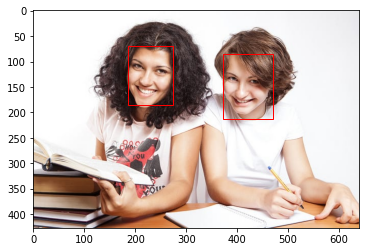

In [9]:
filename = 'test1.jpg'
# load image from file
pixels = pyplot.imread(filename)
# create the detector, using default weights
detector = MTCNN()
# detect faces in the image
faces = detector.detect_faces(pixels)
# display faces on the original image
draw_image_with_boxes(filename, faces)

In [10]:
"""You can draw a circle via the Circle class for the eyes, nose, and mouth."""

# face detection with mtcnn on a photograph
from matplotlib import pyplot
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
from mtcnn.mtcnn import MTCNN

In [15]:
# draw an image with detected objects
def draw_image_with_boxes(filename, result_list):
	# load the image
	data = pyplot.imread(filename)
	# plot the image
	pyplot.imshow(data)
	# get the context for drawing boxes
	ax = pyplot.gca()
	# plot each box
	for result in result_list:
		# get coordinates
		x, y, width, height = result['box']
		# create the shape
		rect = Rectangle((x, y), width, height, fill=False, color='red')
		# draw the box
		ax.add_patch(rect)
		# draw the dots
		for key, value in result['keypoints'].items():
			# create and draw dot
			dot = Circle(value, radius=2, color='red')
			ax.add_patch(dot)
	# show the plot
	pyplot.show()

1/1 [==============================] - 0s 212ms/step


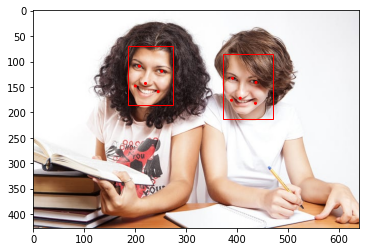

In [16]:
filename = 'test1.jpg'
# load image from file
pixels = pyplot.imread(filename)
# create the detector, using default weights
detector = MTCNN()
# detect faces in the image
faces = detector.detect_faces(pixels)
# display faces on the original image
draw_image_with_boxes(filename, faces)

In [19]:
"""You can now try face detection on the test2.jpg photograph.

You may want to extract the detected faces and pass them as input to another system. This can be achieved by extracting the pixel data directly 
out of the photograph; We can demonstrate this by extracting each face and plotting them as separate subplots. You could just as easily save them 
to file. The draw_faces() below extracts and plots each detected face in a photograph.
"""

# extract and plot each detected face in a photograph
from matplotlib import pyplot
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
from mtcnn.mtcnn import MTCNN

In [20]:
# draw each face separately
def draw_faces(filename, result_list):
	# load the image
	data = pyplot.imread(filename)
	# plot each face as a subplot
	for i in range(len(result_list)):
		# get coordinates
		x1, y1, width, height = result_list[i]['box']
		x2, y2 = x1 + width, y1 + height
		# define subplot
		pyplot.subplot(1, len(result_list), i+1)
		pyplot.axis('off')
		# plot face
		pyplot.imshow(data[y1:y2, x1:x2])
	# show the plot
	pyplot.show()

3/3 [==============================] - 0s 20ms/step


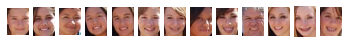

In [21]:
filename = 'test2.jpg'
# load image from file
pixels = pyplot.imread(filename)
# create the detector, using default weights
detector = MTCNN()
# detect faces in the image
faces = detector.detect_faces(pixels)
# display faces on the original image
draw_faces(filename, faces)

Assignment 1: Detect faces from live images taken from webcam.

In [23]:
import cv2
from mtcnn.mtcnn import MTCNN
detector = MTCNN()

video = cv2.VideoCapture(0)

if (video.isOpened() == False):
    print("Web Camera not detected")
while (True):
    ret, frame = video.read()
    if ret == True:
        location = detector.detect_faces(frame)
        if len(location) > 0:
            for face in location:
                x, y, width, height = face['box']
                x2, y2 = x + width, y + height
                cv2.rectangle(frame, (x, y), (x2, y2), (0, 0, 255), 4)
        cv2.imshow("Output",frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            cv2.imwrite(filename='saved.jpg',img=frame)
            break
    else:
        break

video.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 34ms/step


Assignment 2: Once you're done with images, then take short live video sequence and detect faces.

In [1]:
import cv2
from mtcnn.mtcnn import MTCNN
detector = MTCNN()
# Create an object to read
# from camera
video = cv2.VideoCapture(0)

# We need to check if camera
# is opened previously or not
if (video.isOpened() == False):
    print("Error reading video file")

# We need to set resolutions.
# so, convert them from float to integer.
frame_width = int(video.get(3))
frame_height = int(video.get(4))

size = (frame_width, frame_height)

# Below VideoWriter object will create
# a frame of above defined The output
# is stored in 'filename.avi' file.
result = cv2.VideoWriter('output/filename.avi',cv2.VideoWriter_fourcc(*'MJPG'),29, size)
frame_num=0
while (True):
    ret, frame = video.read()
    frame_num += 1
    print(frame_num)
    if ret == True:

        location = detector.detect_faces(frame)
        if len(location) > 0:
            for face in location:
                x, y, width, height = face['box']
                x2, y2 = x + width, y + height
                cv2.rectangle(frame, (x, y), (x2, y2), (0, 0, 255), 4)
        result.write(frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    # Break the loop
    else:
        break


video.release()
result.release()

# Closes all the frames
cv2.destroyAllWindows()

print("The video was successfully saved")

1
1/1 [==============================] - 0s 130ms/step
2
3/3 [==============================] - 0s 8ms/step
3
1/1 [==============================] - 0s 40ms/step
4
1/1 [==============================] - 0s 45ms/step
5
1/1 [==============================] - 0s 40ms/step
6
1/1 [==============================] - 0s 24ms/step
7
1/1 [==============================] - 0s 23ms/step
8
1/1 [==============================] - 0s 57ms/step
9
1/1 [==============================] - 0s 35ms/step
10
1/1 [==============================] - 0s 31ms/step
11
1/1 [==============================] - 0s 28ms/step
12
1/1 [==============================] - 0s 32ms/step
13
1/1 [==============================] - 0s 24ms/step
14
1/1 [==============================] - 0s 24ms/step
15
1/1 [==============================] - 0s 37ms/step
16
1/1 [==============================] - 0s 39ms/step
17
1/1 [==============================] - 0s 28ms/step
18
1/1 [==============================] - 0s 34ms/step
19
1/1 [===========

Assignment 3: Detect faces in mask wearing images.

1/1 [==============================] - 0s 108ms/step


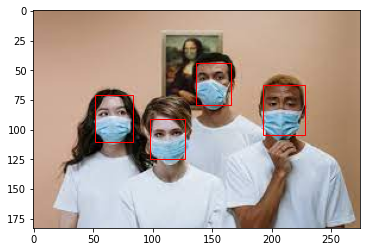

In [1]:
from matplotlib import pyplot
from matplotlib.patches import Rectangle
from mtcnn.mtcnn import MTCNN
 
# draw an image with detected objects
def draw_image_with_boxes(filename, result_list):
	# load the image
	data = pyplot.imread(filename)
	# plot the image
	pyplot.imshow(data)
	# get the context for drawing boxes
	ax = pyplot.gca()
	# plot each box
	for result in result_list:
		# get coordinates
		x, y, width, height = result['box']
		# create the shape
		rect = Rectangle((x, y), width, height, fill=False, color='red')
		# draw the box
		ax.add_patch(rect)
	# show the plot
	pyplot.show()
 
filename = 'm2.jpg'
# load image from file
pixels = pyplot.imread(filename)
# create the detector, using default weights
detector = MTCNN()
# detect faces in the image
faces = detector.detect_faces(pixels)
# display faces on the original image
draw_image_with_boxes(filename, faces)